In [79]:
import numpy as np
import cv2
import os
from sklearn.preprocessing import LabelBinarizer
from imutils import paths

In [80]:
datapath = r"C:\Users\Admin\freelancee\freelance"
outputmodel = r"C:\Users\Admin\freelancee\outputmodel\imageclassificationmodel"
outputlabelbinarizer = r"C:\Users\Admin\freelancee\outputmodel\imageclassificationbinarizer"

In [81]:
cotton_leaf_diseases_labels = set(['alternialeafspot', 'cerosperaleafspot', 'fusariumwilt', 'greymildewimages'])
pathtoimages = list(paths.list_images(datapath))

data = []
labels = []


In [82]:

for images in pathtoimages:
    label = images.split(os.path.sep)[-2]
    

In [83]:
import matplotlib.image as mpimg
%matplotlib inline

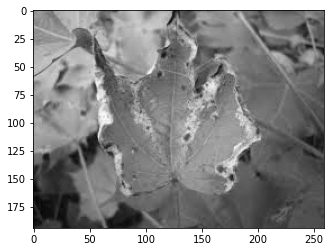

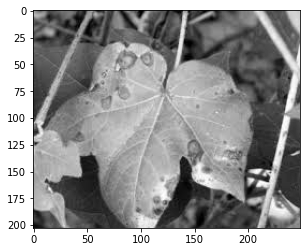

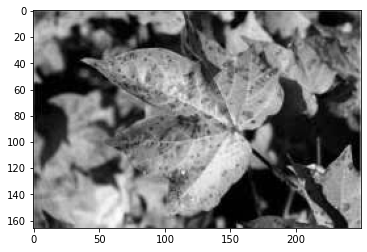

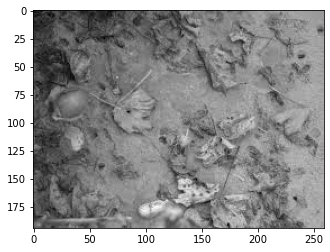

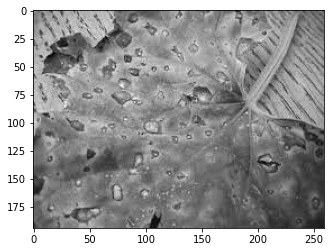

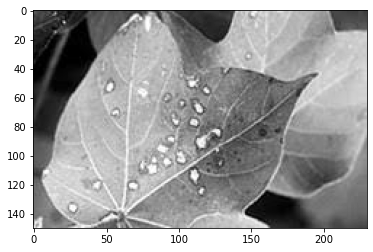

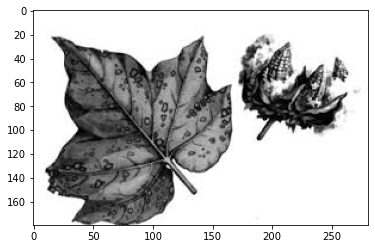

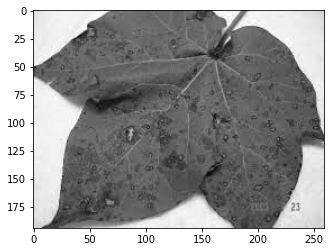

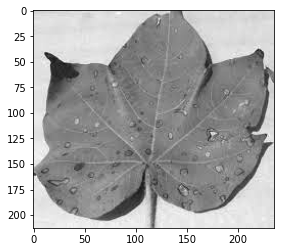

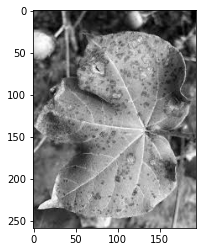

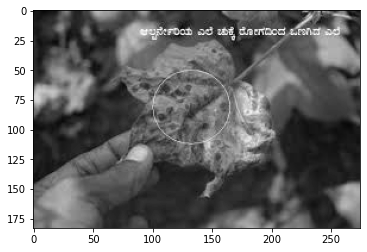

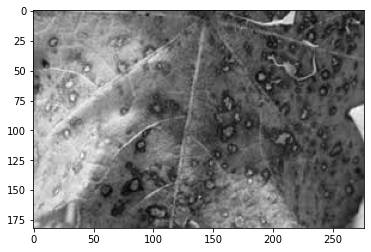

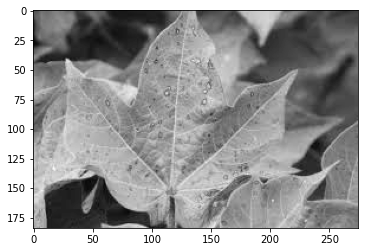

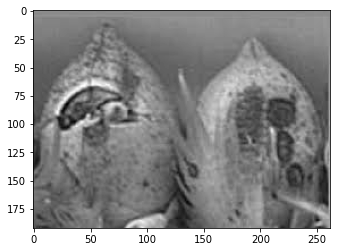

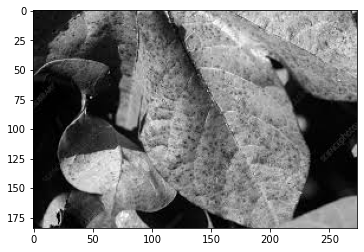

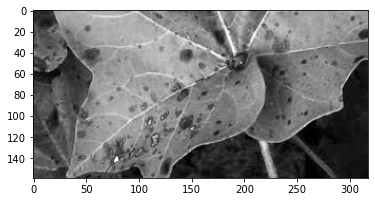

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\Admin\freelancee\freelance"

CATEGORIES = ['alternialeafspot', 'cerosperaleafspot', 'fusariumwilt', 'greymildewimages']

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display

    break 

In [86]:
print(img_array)


[[ 35  35  35 ... 166 167 168]
 [ 42  36  32 ... 157 158 158]
 [ 48  39  32 ... 158 159 160]
 ...
 [ 72  71  69 ...  11  11  10]
 [ 71  70  69 ...  11  11  10]
 [ 72  71  70 ...  11  11  10]]


In [87]:
print(img_array.shape)


(159, 318)


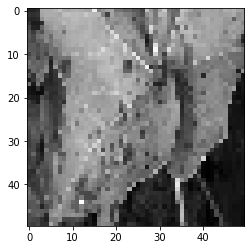

In [88]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

# Image Processing

# Filtering (Gaussian)

A 9 x 9 Gaussian filter (with sigma = 0) will be applied to the image.

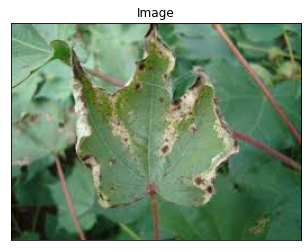

In [109]:
image = cv2.imread('A1.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(11,4))
plt.imshow(image)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()

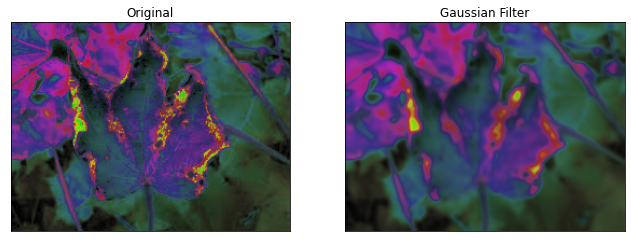

In [110]:
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The Gaussian Filter does a better job of retaining the edges of the image when compared to the mean filter however it also produces artifacts on a color image.



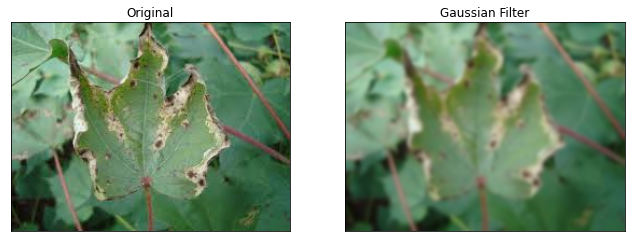

In [111]:
new_image_gauss = cv2.GaussianBlur(image, (figure_size, figure_size),0)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

A 9 x 9 Gaussian blur was able to retain more detail than a 9 x 9 mean filter and it was able to remove some noise. The Gaussian filter did not create artifacts for the grayscale image.



# Noise Removal

In [117]:
def noise_removal(data, filter_size):
    temp = []
    indexer = filter_size // 2
    new_image = data.copy()
    nrow, ncol = data.shape
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if (k > -1) and (k < nrow):
                        if (m > -1) and (m < ncol):
                            temp.append(data[k,m])
            temp.remove(data[i,j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i,j] > max_value:
                new_image[i,j] = max_value
            elif data[i,j] < min_value:
                new_image[i,j] = min_value
            temp =[]
    return new_image.copy()

Then a 9 x 9 noise removal will be applied to a grayscale image.



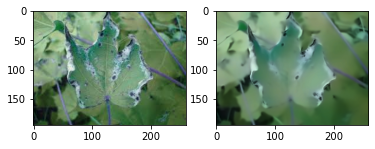

In [130]:

img = cv2.imread('A1.jpg')

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

# Resizing

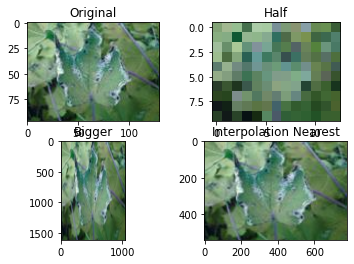

In [141]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("A1.jpg", 1)
# Loading the image

half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))

stretch_near = cv2.resize(image, (780, 540),
            interpolation = cv2.INTER_NEAREST)


Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4

for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])

plt.show()


# Data Augmentation

# Horizontal and Vertical Shift Augmentation


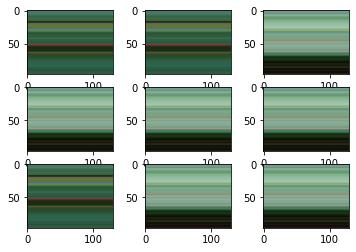

In [144]:

# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('A1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

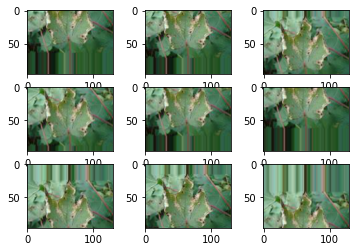

In [146]:

# example of vertical shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('A1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Horizontal and Vertical Flip Augmentation


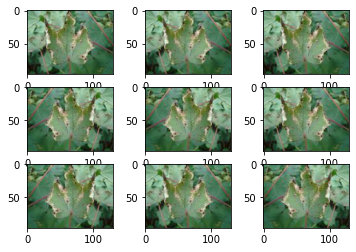

In [148]:

# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('A1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Random Rotation Augmentation


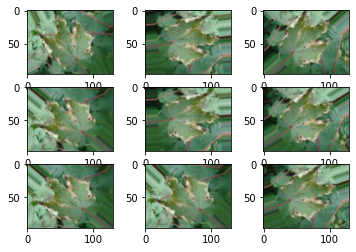

In [150]:

# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('A1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Random Brightness Augmentation


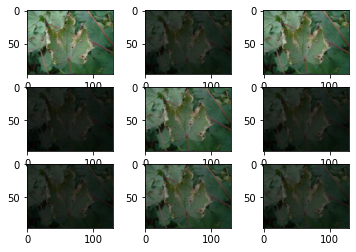

In [152]:

# example of brighting image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('A1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Random Zoom Augmentation


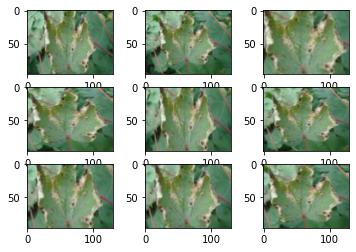

In [154]:

# example of zoom image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('A1.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [155]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            

create_training_data()

print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1333.27it/s]

79


In [156]:
import random

random.shuffle(training_data)

In [157]:
for sample in training_data[:10]:
    print(sample[1])

2
2
0
2
2
0
0
3
1
2


In [158]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[117]
   [155]
   [131]
   ...
   [ 73]
   [ 91]
   [ 45]]

  [[ 78]
   [123]
   [141]
   ...
   [ 42]
   [ 45]
   [ 79]]

  [[ 44]
   [153]
   [ 99]
   ...
   [ 46]
   [ 33]
   [ 47]]

  ...

  [[213]
   [203]
   [200]
   ...
   [161]
   [186]
   [200]]

  [[199]
   [211]
   [209]
   ...
   [158]
   [187]
   [208]]

  [[207]
   [208]
   [211]
   ...
   [188]
   [203]
   [216]]]]


In [159]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [160]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [161]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [162]:
def cnn_model():
    model=Sequential()
    model.add(Conv2D(32,5,5, padding='same',input_shape=(1,28,28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [163]:
model=cnn_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10, batch_size=200, verbose=2)
score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

NameError: name 'num_classes' is not defined

In [91]:
image = cv2.imread("C:\\Users\\Admin\\freelance\\alternialeafspot\\A1.jpg")


In [92]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(11,4))
plt.imshow(image)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-byo84cxb\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [93]:
image = cv2.imread("A1.jpg")
type(image)

NoneType

# Mean Filter

A 9 x 9 mean filter will be applied to the image.

In [94]:
image = cv2.imread('A1.JPG') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-byo84cxb\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


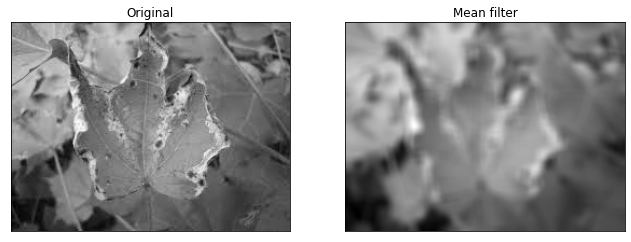

In [24]:
# The image will first be converted to grayscale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

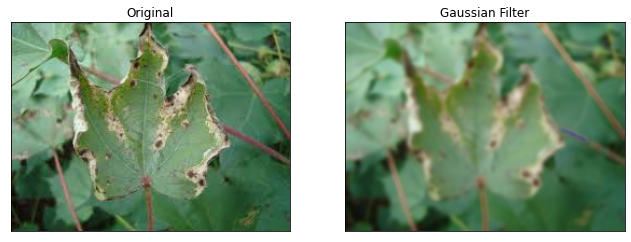

In [25]:
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

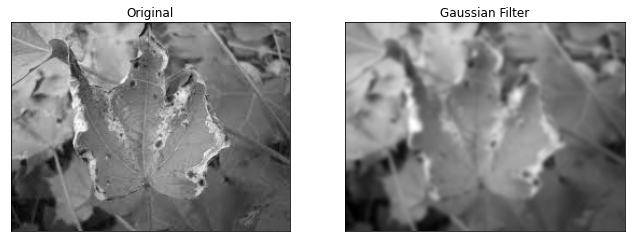

In [26]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

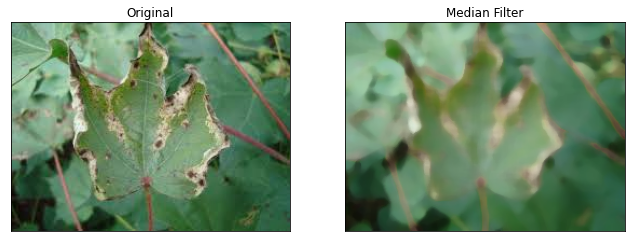

In [27]:
new_image = cv2.medianBlur(image, figure_size)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

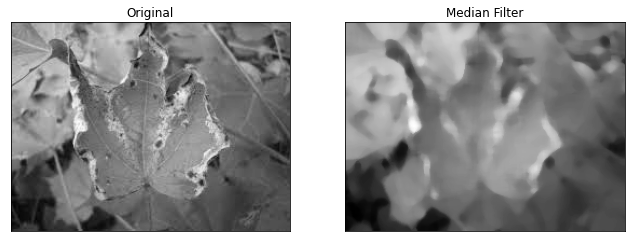

In [28]:

new_image = cv2.medianBlur(image2, figure_size)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [29]:

# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size):
    temp = []
    indexer = filter_size // 2
    new_image = data.copy()
    nrow, ncol = data.shape
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if (k > -1) and (k < nrow):
                        if (m > -1) and (m < ncol):
                            temp.append(data[k,m])
            temp.remove(data[i,j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i,j] > max_value:
                new_image[i,j] = max_value
            elif data[i,j] < min_value:
                new_image[i,j] = min_value
            temp =[]
    return new_image.copy()

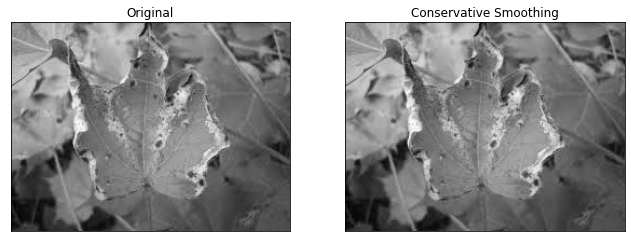

In [30]:
new_image = conservative_smoothing_gray(image2,9)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [24]:
pip install tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=e47e98b65adf8a67b5e23b9427ce5578e4315f441a76ec254e88516a86204553
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\54\aa\01\724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.14.1
    Uninstalling absl-py-0.14.1:
      Successfully uninstalled absl-py-0.14.1


In [25]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [26]:
print(tf.__version__)

2.6.0
